<a href="https://colab.research.google.com/github/Adwait-Naravane/Projects--comp-phy-/blob/main/Stellar%20Physics/simple_polytrope.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import math
import matplotlib.animation as animation
from scipy.integrate import odeint, trapz
import pandas as pd

The Lane-Emden equation for stellar structure.\
$\frac{1}{\xi^2} \frac{d}{d \xi}(\xi^2 \frac{d \theta_n}{d \xi}) + \theta_n^n = 0 $

In [38]:


def model(theta, t, n):
  
  theta1 = theta[0]
  theta2 = theta[1]
  dtheta1_dt = theta2
  dtheta2_dt = -((theta1)**n) - (2/t)*theta2
  dtheta_dt = [dtheta1_dt, dtheta2_dt]
  return dtheta_dt

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  


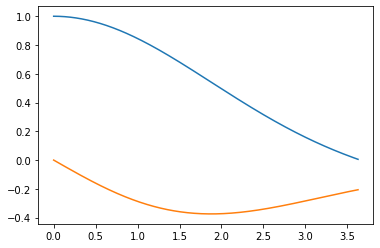

In [52]:
#initial conditions
theta_0 = [1,0]
t = np.linspace(0.0001,20, 3000)
n = 1.5
theta = odeint(model , theta_0, t, args = (n,) )

plt.plot(t, theta.T[0])
plt.plot(t, theta.T[1])

dat1 = np.column_stack((t, theta))
df = pd.DataFrame(data = dat1, columns = ['t', 'theta', 'dtheta_dt'])

In [53]:
'''
The surface of the polytrope is at a point where theta is 0. 
'''
fin = df.index[df['theta']==min(abs(df['theta']))][0]
df = df[:fin]
df.loc[fin-1]

t            3.621289
theta        0.006659
dtheta_dt   -0.206956
Name: 543, dtype: float64

In [54]:
#all constants needed for single polytrope.
M = 2*(10**30)
R = 696340000
a = R/df.iloc[-1]['t']
G = 6.67 * (10**(-11))

K = (R**((3-n)/n)) * (M**((n-1)/n)) * ((4*np.pi)**(1/n))*((n+1)**(-1)) * ((df.iloc[-1]['t']**((-1-n)/n))) * ((-1*df.iloc[-1]['dtheta_dt'])**((1-n)/n))*G
rho_c = ((K*(n+1))/(4*np.pi*G*(a**2)))**(n/(n-1))

$\rho = \rho_c \theta^n(\xi)$\
$P = K \rho^{1+1/n}$\
and $m(r) = 4 \pi \int_0^r r^2 \rho(r) dr$


In [55]:
df['density'] = rho_c*(df['theta']**n)
df['pressure'] = K*(df['density']**(1+1/n))
df['Radius'] = a*df['t']

df['temperory'] = df['density']*(df['Radius']**2)*4*np.pi
mass = pd.DataFrame(np.array([trapz(df.loc[:i]['temperory'], x = df.loc[:i]['Radius']) for i in range(len(df))]), columns=['mass'])
df['mass'] = mass
df = df.drop(columns=['temperory'])

'''
Some extra quantitities if one is playing around with stellar oscillations.
'''
#df['potential'] = G*df['mass']/(df['Radius']**2)
#df['sound'] = ((5/3)*df['pressure']/df['density'])**0.5
#df['brunt-vais'] = (1/2)*df['potential']/df['sound']

#df

'\nSome extra quantitities if one is playing around with stellar oscillations.\n'

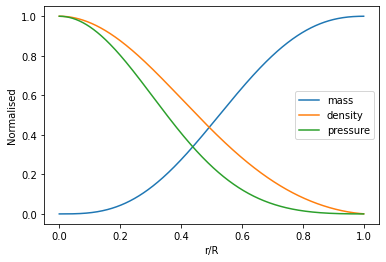

In [56]:
plt.plot(df['Radius']/R, df['mass']/M, label = 'mass')
plt.plot(df['Radius']/R, df['density']/rho_c, label = 'density')
plt.plot(df['Radius']/R, df['pressure']/(df.iloc[0]['pressure']), label = 'pressure')
plt.xlabel('r/R')
plt.ylabel('Normalised')
plt.legend()